In [2]:
import requests
import numpy as np
import pandas as pd
import json

## Gathering data

In [396]:
tw = pd.read_csv("twitter-archive-enhanced.csv")
# Dataset provided by Udacity, from "We rate dogs"

### Querying Twitter Data using Tweepy

In [397]:
import tweepy

consumer_key = 'string_of_chars_that_is_consumer_key'
consumer_secret = 'string_of_chars_that_is_consumer_secret'
access_token = 'string_of_chars_that_is_access_token'
access_secret = 'string_of_chars_that_is_access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) # http://docs.tweepy.org/en/v3.5.0/api.html

In [398]:
init_v = [-1 for i in range(len(tw))]
tw['favorite_count'] = init_v
tw['retweet_count'] = init_v

errors = ['' for i in range(len(tw))]
tw['errors'] = errors
tw['json_tw'] = errors

In [15]:
import sys
for i in range(0,len(tw)):
    try:
        fav_c = api.get_status(tw.tweet_id[i]).favorite_count
        tw.set_value(i,'favorite_count', fav_c)
        
        rtw_c = api.get_status(tw.tweet_id[i]).retweet_count
        tw.set_value(i,'retweet_count', rtw_c)
        
        json_tw = js = api.get_status(tw.tweet_id[i])._json
        tw.set_value(i,'json_tw', json_tw)
    except:
        e = sys.exc_info()[0]
        tw.set_value(i, 'errors', str(e) )

In [415]:
# Saving GATHERED dataframe
tw.to_csv("tw_master.csv", sep = ",")

In [24]:
tw.loc[6:10,:] # selecting to view rows 6 through 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,errors,json_tw
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,10,Jax,None,None,None,None,12012,2126,,{'created_at': 'Fri Jul 28 16:27:12 +0000 2017...
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,10,None,None,None,None,None,66395,19421,,{'created_at': 'Fri Jul 28 00:22:40 +0000 2017...
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,10,Zoey,None,None,None,None,28102,4366,,{'created_at': 'Thu Jul 27 16:25:51 +0000 2017...
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10,Cassie,doggo,None,None,None,32347,7617,,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,10,Koda,None,None,None,None,30996,7525,,{'created_at': 'Wed Jul 26 00:31:25 +0000 2017...


In [25]:
len(tw)

2356

### Loading images

In [26]:
images = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
# Provided by Udacity

In [27]:
type(images.text)

str

In [28]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

images=StringIO(images.text)

img = pd.read_csv(images, sep="\t")

In [29]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
img.to_csv("img_master.csv", sep = ",")

In [31]:
len(img)

2075

##### Other possibilities for getting at info of tweets

In [54]:
api.get_status(tw.tweet_id[1])._json['favorite_count']

33659

In [28]:
api.get_status(tw.tweet_id[1]).favorite_count

33659

In [59]:
js = api.get_status(tw.tweet_id[1])._json
js['favorite_count']

33659

## Assessing Data

### Quality

#### Both
- Len of images (img) and of twitter data (tw) are different.

#### Twitter dataset
- Some dogs do not have a dog stage.
- Some dogs' stage does not coincide with the one given in the text.
- Some dog names were incorrectly captured: such, an, a, the, quite. I suppose it's because this is capture as what follows "This is ____". I would include all determiners of English: all possesive pronouns, demonstrative, etc. In the end, dogs either have a name that starts with a capitalized letter or None, else they are most likely not captured right.
- There were seven twits removed by their users.
- We are missing the blep column.

#### Images dataset
- Some dog breeds are capitalized while others aren't.
- Many images do not belong to a dog.
- Dog breed should be a categorical type.

### Tidiness

#### Twitter dataset
- Dog stage is divided into separate columns when it is a single variable.
- Time stamp should be four variables: day, month, year, hour, and perhaps add time zone.

#### Images dataset
- Dog breed information in several columns.

In [155]:
#tw.info()   img.info()
#tw.head(10) img.head(10)
#tw[tw.timestamp.isnull()]
#tw[tw.tweet_id.isnull()]
#tw[tw.tweet_id.duplicated()]
#len(tw.tweet_id.unique()) == len(tw)
#tw[tw.text.isnull()]
#sum(tw.favorite_count == -1)
#tw.puppo.unique
#set(img.tweet_id.unique()).issubset(set(tw.tweet_id.unique()))  -- all tweet_id of img are in tw

### Quality

#### Both
- Length of images (img) and of twitter data (tw) are different.

#### Twitter dataset
- There were eight tweets removed by their users.
- Some dogs that were given a stage by the tweet, do not have a dog stage in the table.
- One dog's stage does not coincide with the one given in the text of the tweet.
- Some dog names were incorrectly captured: 'such', 'an', 'a', 'the', 'quite', among others.
- Blep column missing.

-- Added on iteration while cleaning:
 - Incorrectly entered name: tw.name[775] as "O" when it should be "O'Malley"

#### Images dataset
- Some dog breeds are capitalized while others aren't.
- Many images do not belong to a dog.



### Tidiness

#### Twitter dataset
- Dog stage is divided into separate columns when it is a single variable: dog stage.
- Time stamp column contains six variables: day, month, year, hour, minute, second. Perhaps add time zone.

#### Images dataset
- Dog breed information is contained in several columns. We know this from the explanation of the design of the dataset.

# Cleaning Data

## Plan and steps

#### Twitter dataset
*Quality*
- Find indices of the seven twits were removed by their users, delete the corresponding rows.   sum(tw.favorite_count == -1)
- Search the text for a word in the set of ['doggo', 'pupper', 'puppo'] and fill in the stage for the dogs that don't have a dog stage.
If the  dog has a stage, and it doesn't coincide, save the index and check the reason(s). Adjust accordingly.
- Initialize blep column as boolean False. Search the text for 'blep', if it appears, enter True in the corresponding column.
- Create a list of all English determiners, match the rows that have any of them as a name, and remove them from names. Check visually for any
noncapitalized names left if list is small.


*Tidiness*
- Make column stage that contains the contents of columns doggo, pupper, puppo.
- Divide time stamp into day,month,year,hour.

#### Images dataset
*Quality*
- Capitalize all dog breeds.
- Eliminate rows for which dog == False.
- Make all values of column breed into categorical.
       
      
*Tidiness*      
- Keep only highest ranked dog breed columns (p1) and remove the rest.

#### Both 
- Merge twitter dataset with images dataset based on tweet_id. Images dataset tweet_id values are a subset of twitter dataset tweet_id values.

#### Copies

In [3]:
tw = pd.read_csv("tw_master.csv")
img = pd.read_csv("img_master.csv")
# Making copies of original datasets
tw_clean = tw.copy()
img_clean = img.copy()
len(tw_clean)

2356

## tw_clean dataset

### * Tidiness*
### * Quality*

#### Find indices of the seven twits were removed by their users, delete the corresponding rows.

In [72]:
# Code
indices = tw_clean.index[tw_clean.favorite_count == -1].tolist()
tw_clean.drop(tw_clean.index[[indices]],inplace=True)

len(tw_clean)

2349

In [73]:
    # Test
    sum(tw_clean.favorite_count == -1)

0

#### Make column stage that contains the contents of columns doggo, pupper, puppo. 
#### It also contains an empty value for when the dog stage has not been determined.

In [4]:
# Cases in which stage has not been detected
tw_clean['no_stage'] = 'None'
tw_clean.loc[(tw_clean.puppo == 'None') & 
               (tw_clean.doggo == 'None') & 
               (tw_clean.pupper == 'None'), 'no_stage'] = '-'


In [5]:
# Make column stage that contains the contents of columns doggo, pupper, puppo.
cols = list(tw_clean.columns)
cols.remove('doggo')
cols.remove('pupper')
cols.remove('puppo')
cols.remove('no_stage')

tw_clean = pd.melt(tw_clean, id_vars = cols,
                var_name = 'Dog_stage', value_name = 'Stage_value')

tw_clean = tw_clean[tw_clean.Stage_value != 'None']
len(tw_clean)

2369

There are 13 entries for which the dog has been given 2 stages.
Dataframe dupls contains them. 

In [6]:
dupls = tw_clean[tw_clean.duplicated('tweet_id')]
dupls = dupls.reset_index(drop=True)
dupl_tweet_id = dupls.tweet_id.unique()

In [32]:
dupls.tweet_id[12]

855851453814013952

For such a small number, I manually checked them and found that most contain two dogs or a dog with two stages.   

Below, change numbers from 0 to 12 to see this in '...== dupls.tweet_id[8]].reset_index...'

In [7]:
tw_clean[tw_clean.tweet_id == dupls.tweet_id[5]].reset_index(drop=True).text[0]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

So, they get their own label. (Drop duplicates first)

In [11]:
tw_clean = tw_clean.drop_duplicates(subset='tweet_id')

tw_clean.set_value(tw_clean.text.str.contains('pupper.*doggo|doggo.*pupper', case = False), 
                   'Dog_stage', 'pupper-doggo')
tw_clean.set_value(tw_clean.text.str.contains('puppo.*doggo|doggo.*puppo', case = False),
                   'Dog_stage', 'puppo-doggo')
tw_clean.set_value(tw_clean.text.str.contains('pupper.*puppo|puppo.*pupper', case = False), 
                   'Dog_stage', 'pupper-puppo')

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage,Stage_value
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,doggo
43,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,doggo
99,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,doggo
108,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,doggo
110,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,doggo
121,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,doggo
172,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,doggo
191,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,doggo
200,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,doggo
211,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,doggo


There are no cases in which the three stages appear together

In [12]:
len(tw_clean[tw_clean.text.str.contains('pupper.*doggo.*puppo', case = False)])

0

In [80]:
tw_clean = tw_clean.drop('Stage_value', axis=1)

In [81]:
len(tw_clean)

2349

In [82]:
    # Test
    tw_clean.Dog_stage.unique()

array(['doggo', 'puppo-doggo', 'pupper-doggo', 'pupper', 'puppo',
       'no_breed'], dtype=object)

In [83]:
    tw_clean.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo
42,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo
97,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo
106,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo
108,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo


#### Search the text for a word in the set of ['doggo', 'pupper', 'puppo']  and fill in the stage for the dogs that don't have a dog stage. 
#### If the  dog has a stage, and it doesn't coincide, save the index and check the reason(s). Adjust accordingly.

In [84]:
# Two values (either from two dogs, or one dog with two qualifications)
tw_clean.set_value(tw_clean.text.str.contains('pupper.*doggo|doggo.*pupper', case = False), 
                   'Dog_stage_new', 'pupper-doggo')
tw_clean.set_value(tw_clean.text.str.contains('puppo.*doggo|doggo.*puppo', case = False), 
                   'Dog_stage_new', 'puppo-doggo')
tw_clean.set_value(tw_clean.text.str.contains('pupper.*puppo|puppo.*pupper', case = False),
                   'Dog_stage_new', 'pupper-puppo')

# Single value
tw_clean.set_value(~tw_clean.text.str.contains('doggo|puppo', case = False) & 
                   tw_clean.text.str.contains('pupper', case = False), 
                   'Dog_stage_new', 'pupper')
tw_clean.set_value(~tw_clean.text.str.contains('doggo|pupper', case = False) &
                   tw_clean.text.str.contains('puppo', case = False), 
                'Dog_stage_new', 'puppo')
tw_clean.set_value(~tw_clean.text.str.contains('pupper|puppo', case = False) &
                   tw_clean.text.str.contains('doggo', case = False), 
                   'Dog_stage_new', 'doggo')


,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage,Dog_stage_new
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,doggo
42,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,doggo
97,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,doggo
106,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,doggo
108,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,doggo
118,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,doggo
168,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,puppo-doggo
187,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,puppo-doggo
196,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,doggo
207,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,doggo


In [85]:
# Agreement on those tweets for wchich there was no dog stage assigned (between original stage, and my discovered)
new = tw_clean.Dog_stage_new.isnull()
old_breed = tw_clean.Dog_stage == 'no_stage'
tw_clean.set_value(new & old_breed, 'Dog_stage_new', 'no_stage')

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage,Dog_stage_new
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,doggo
42,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,doggo
97,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,doggo
106,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,doggo
108,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,doggo
118,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,doggo
168,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,puppo-doggo
187,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,puppo-doggo
196,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,doggo
207,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,doggo


Interestingly, I found that words that contain the dog stage but have more words were not recognized in the original dataset. 

The overwhelming case for this is plurals: puppers, doggos, puppos; but also :pupperdoop, puppergeddon, pupporazi,apuppologized, puppoccino, puppertunity.

In [86]:
# Compare given dog stage with my found dog stage
tw_clean[~(tw_clean.Dog_stage == tw_clean.Dog_stage_new)]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage,Dog_stage_new
7100,54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,...,13,10,Gary,None,51211,10975,NaN,{'created_at': 'Mon Jul 03 00:11:11 +0000 2017...,no_breed,pupper
7129,83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,...,14,10,None,None,23706,4742,NaN,{'created_at': 'Sun Jun 18 20:30:39 +0000 2017...,no_breed,doggo
7131,85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,...,13,10,Venti,None,28278,4839,NaN,{'created_at': 'Sat Jun 17 16:52:05 +0000 2017...,no_breed,puppo
7151,106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,...,13,10,Lassie,None,38809,11713,NaN,{'created_at': 'Tue Jun 06 00:01:46 +0000 2017...,no_breed,puppo
7178,134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,...,12,10,Lili,None,19921,3682,NaN,{'created_at': 'Mon May 22 16:06:55 +0000 2017...,no_breed,puppo
7271,228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,...,11,10,None,None,8740,822,NaN,{'created_at': 'Sat Apr 01 16:41:12 +0000 2017...,no_breed,puppo
7310,268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,NaN,NaN,NaN,...,14,10,None,None,13645,4112,NaN,{'created_at': 'Tue Mar 14 00:04:30 +0000 2017...,no_breed,doggo
7316,274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,...,10,10,None,None,196,3,NaN,{'created_at': 'Sat Mar 11 22:59:09 +0000 2017...,no_breed,puppo
7338,296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,...,13,10,Lucy,None,22862,5940,NaN,{'created_at': 'Thu Mar 02 18:17:34 +0000 2017...,no_breed,puppo
7344,302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,...,11,10,None,None,0,618,NaN,{'created_at': 'Tue Feb 28 18:46:45 +0000 2017...,no_breed,doggo


In [87]:
tw_clean.text[7100]

"This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s"

In [88]:
# Do away with original values and keep the more thorough new dog stage column
tw_clean = tw_clean.drop('Dog_stage', axis=1)

In [89]:
tw_clean.rename(columns = {'Dog_stage_new':'Dog_stage'})

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo
42,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo
97,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo
106,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo
108,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo
118,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo
168,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo
187,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo
196,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo
207,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo


#### Test
Both visually and programmatically, to make sure that what we intended to do was successful.

#### Initialize blep column as boolean False. Search the text for 'blep', if it appears, enter True in the corresponding column.

In [90]:
tw_clean['blep'] = False

There are only four cases of "bleps".

In [91]:
print(len(tw_clean[tw_clean.text.str.contains('blep', case = False)]))

tw_clean.set_value(tw_clean.text.str.contains('blep', case = False),'blep', True)

4


,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage_new,blep
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,False
42,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,False
97,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,False
106,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,False
108,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,False
118,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,False
168,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,False
187,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,False
196,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,False
207,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,False


In [92]:
    # Test
    tw_clean[tw_clean.text.str.contains('blep', case = False)].text[:]

2377    This is Roscoe. Another pupper fallen victim t...
7107    Meet Jesse. He's a Fetty Woof. His tongue ejec...
7183    This is Sammy. Her tongue ejects without warni...
7565    I call this one "A Blep by the Sea" 12/10 http...
Name: text, dtype: object

#### Create a list of all English determiners, match the rows that have any of them as a name, and remove them from names. Check visually for any noncapitalized names left if list is small.

In [93]:
# Reset indices, changed after modifications above
tw_clean = tw_clean.reset_index(drop=True)

In [94]:
# Get all unique names that do not start with uppper case and are not "None"
not_names = tw_clean[~tw_clean.name.str.istitle() & ~tw_clean.name.str.isupper()]
not_names.name.unique()

array(['just', 'one', 'his', 'a', 'mad', 'actually', 'all', 'the', 'such',
       'quite', 'not', 'incredibly', 'BeBe', 'an', 'very', 'DonDon', 'my',
       'getting', 'this', 'unacceptable', 'old', 'infuriating', 'CeCe',
       'by', 'officially', 'life', 'light', 'space', 'DayZ'], dtype=object)

Three realizations from looking at the list above:
- I do not need to enter all English determiners.
- There are words that are not English determiners that still get captured as names.

**If I wanted to scale up and reuse this code for more data, then I would have to think carefully about this set. For example:
 - including all English determiners and what other word types and word tokens would be relevant.

Steps:
- Create set of words that are not names and use it filter 'name' columns off them.

In [95]:
false_names = ['just', 'one', 'his', 'a', 'mad', 'actually', 'all', 'the', 'such',
       'quite', 'not', 'incredibly','an', 'very', 'my',
       'getting', 'this', 'unacceptable', 'old', 'infuriating',
       'by', 'officially', 'life', 'light', 'space']

In [96]:
tw_clean.set_value(tw_clean.name.isin(false_names), 'name', 'None')

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage_new,blep
0,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,False
1,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,False
2,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,False
3,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,False
4,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,False
5,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,False
6,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,False
7,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,False
8,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,False
9,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,False


In [97]:
# Of these 2 full uppercase cases, one has to be fixed manually, "O'Malley" instead of "O"
tw_clean[tw_clean.name.str.isupper()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage_new,blep
1008,775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,...,10,10,O,None,10593,2872,NaN,{'created_at': 'Wed Sep 14 23:30:38 +0000 2016...,no_breed,False
2034,2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,...,10,10,JD,None,1149,611,NaN,{'created_at': 'Tue Dec 01 04:14:59 +0000 2015...,no_breed,False


In [98]:
tw_clean.set_value(1008, 'name', "O'Malley")

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage_new,blep
0,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14,10,Cassie,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,False
1,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,12,10,Yogi,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,False
2,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,12,10,None,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,False
3,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,12,10,Napolean,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,False
4,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,14,10,None,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,False
5,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,12,10,Scout,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,False
6,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,13,10,None,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,False
7,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,13,10,None,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,False
8,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,11,10,None,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,False
9,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,13,10,Astrid,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,False


In [99]:
    # Test
    print(sum(tw_clean.name.isin(false_names)))
    tw_clean.name[1008]

0


"O'Malley"

#### Divide time stamp into day, month, year, hour, minutes.

In [100]:
tw_clean.timestamp[0]

'2017-07-26 15:59:51 +0000'

In [101]:
# Day, month, year
date = tw_clean.timestamp.str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand=True)
tw_clean['year'], tw_clean['month'], tw_clean['day'] = date[0].str.split('-',2).str

#tw_clean.timestamp.str.extract('(\d{4})[-](\d{2})[-](\d{2})', expand=True)


In [102]:
tw_clean

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,floofer,favorite_count,retweet_count,errors,json_tw,Dog_stage_new,blep,year,month,day
0,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,None,32347,7617,NaN,{'created_at': 'Wed Jul 26 15:59:51 +0000 2017...,doggo,False,2017,07,26
1,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,None,20652,3079,NaN,{'created_at': 'Sun Jul 09 21:29:42 +0000 2017...,doggo,False,2017,07,09
2,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,None,27805,5601,NaN,{'created_at': 'Fri Jun 09 00:02:31 +0000 2017...,doggo,False,2017,06,09
3,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,None,20592,3587,NaN,{'created_at': 'Sun Jun 04 23:56:03 +0000 2017...,doggo,False,2017,06,04
4,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,None,21329,5689,NaN,{'created_at': 'Sat Jun 03 20:33:19 +0000 2017...,doggo,False,2017,06,03
5,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,None,16352,3279,NaN,{'created_at': 'Tue May 30 16:49:31 +0000 2017...,doggo,False,2017,05,30
6,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,None,16169,3718,NaN,{'created_at': 'Mon May 01 00:40:27 +0000 2017...,puppo-doggo,False,2017,05,01
7,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,None,47490,19008,NaN,{'created_at': 'Sat Apr 22 18:31:02 +0000 2017...,puppo-doggo,False,2017,04,22
8,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,floofer,17029,3406,NaN,{'created_at': 'Mon Apr 17 16:34:26 +0000 2017...,doggo,False,2017,04,17
9,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,None,0,10585,NaN,{'created_at': 'Wed Apr 12 00:23:33 +0000 2017...,doggo,False,2017,04,12


In [103]:
# Hour, minute, second
time = tw_clean.timestamp.str.extract('(\d{2}[:]\d{2}[:]\d{2})', expand=True)
time
tw_clean['hour'], tw_clean['minute'], tw_clean['second'] = time[0].str.split(':',2).str

#tw_clean.timestamp.str.extract('(\d{2})[:](\d{2})[:](\d{2})', expand=True)


In [104]:
    # Test
    

## img_clean dataset

### * tidiness*

### * quality*

Not part of this assignment, but breed recognition fails even with some high levels of confidence, like the "chihuahuas" at indices 27,35,and 2073

In [105]:
# Keep only highest ranked dog breed columns (p1) and remove the rest

In [106]:
img_clean = img.copy()
img_clean.drop(img_clean.columns[7:], axis=1, inplace=True)

In [107]:
    # Test
    img_clean

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
5,5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True
6,6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
7,7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True
8,8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
9,9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True


In [108]:
# Eliminate rows for which dog == False.

In [109]:
indices = img_clean.index[img_clean.p1_dog == False].tolist()
img_clean.drop(img_clean.index[[indices]],inplace=True)

In [110]:
    # Test
    img_clean.p1_dog.unique()

array([ True], dtype=bool)

In [111]:
# Capitalize all dog breeds.

In [112]:
img_clean.p1 = img_clean.p1.str.title()

In [113]:
    # Test
    sum(~img_clean.p1.str.istitle())

0

In [115]:
    # Test
    img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 7 columns):
Unnamed: 0    1532 non-null int64
tweet_id      1532 non-null int64
jpg_url       1532 non-null object
img_num       1532 non-null int64
p1            1532 non-null object
p1_conf       1532 non-null float64
p1_dog        1532 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 85.3+ KB


## Both tw_clean and img_clean

Merge twitter dataset with images dataset based on tweet_id. Images dataset tweet_id values are a subset of twitter dataset tweet_id values.

In [116]:
tw_clean = tw_clean.merge(img_clean,how='left', left_on='tweet_id', right_on='tweet_id')
# https://stackoverflow.com/questions/33086881/merge-two-python-pandas-data-frames-of-different-length-but-keep-all-rows-in-out
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
tw_clean.head()

,Unnamed: 0_x,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,day,hour,minute,second,Unnamed: 0_y,jpg_url,img_num,p1,p1_conf,p1_dog
0,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,26,15,59,51,2065.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True
1,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,09,21,29,42,2035.0,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_Shepherd,0.707046,True
2,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,09,00,02,31,1989.0,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_Retriever,0.476913,True
3,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,04,23,56,03,1981.0,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,Komondor,0.974781,True
4,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,03,20,33,19,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
tw_clean

,Unnamed: 0_x,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,day,hour,minute,second,Unnamed: 0_y,jpg_url,img_num,p1,p1_conf,p1_dog
0,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,26,15,59,51,2065.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True
1,43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,09,21,29,42,2035.0,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,German_Shepherd,0.707046,True
2,99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,...,09,00,02,31,1989.0,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2.0,Labrador_Retriever,0.476913,True
3,108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,...,04,23,56,03,1981.0,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,Komondor,0.974781,True
4,110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,...,03,20,33,19,NaN,NaN,NaN,NaN,NaN,NaN
5,121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,...,30,16,49,31,1972.0,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,Chihuahua,0.955156,True
6,172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,...,01,00,40,27,1930.0,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1.0,Golden_Retriever,0.578120,True
7,191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,...,22,18,31,02,1919.0,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,Flat-Coated_Retriever,0.321676,True
8,200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,...,17,16,34,26,1913.0,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_Springer,0.354733,True
9,211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,...,12,00,23,33,1903.0,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1.0,Staffordshire_Bullterrier,0.757547,True


# Analysis and plots
At least three (3) insights and one (1) visualization must be produced.

### Wordcloud

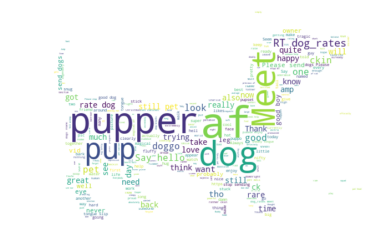

In [119]:
# Code from https://amueller.github.io/word_cloud/auto_examples/masked.html
# Slightly modified to be applied to my data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Read the whole text.
texts = tw_clean.text.str.cat(sep=' ')
texts = texts.replace('https://t.co/','')

# read the mask image
# taken from
# http://www.stencilry.org/stencils/animals/dog/dog+3.gif
dog_mask = np.array(Image.open("dog_mask.png"))

stopwords = set(STOPWORDS)
stopwords.add("@dog_rates")

wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(texts)

# store to file
wc.to_file("dog_wordcloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
#plt.imshow(dog_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")


### Most popular breeds

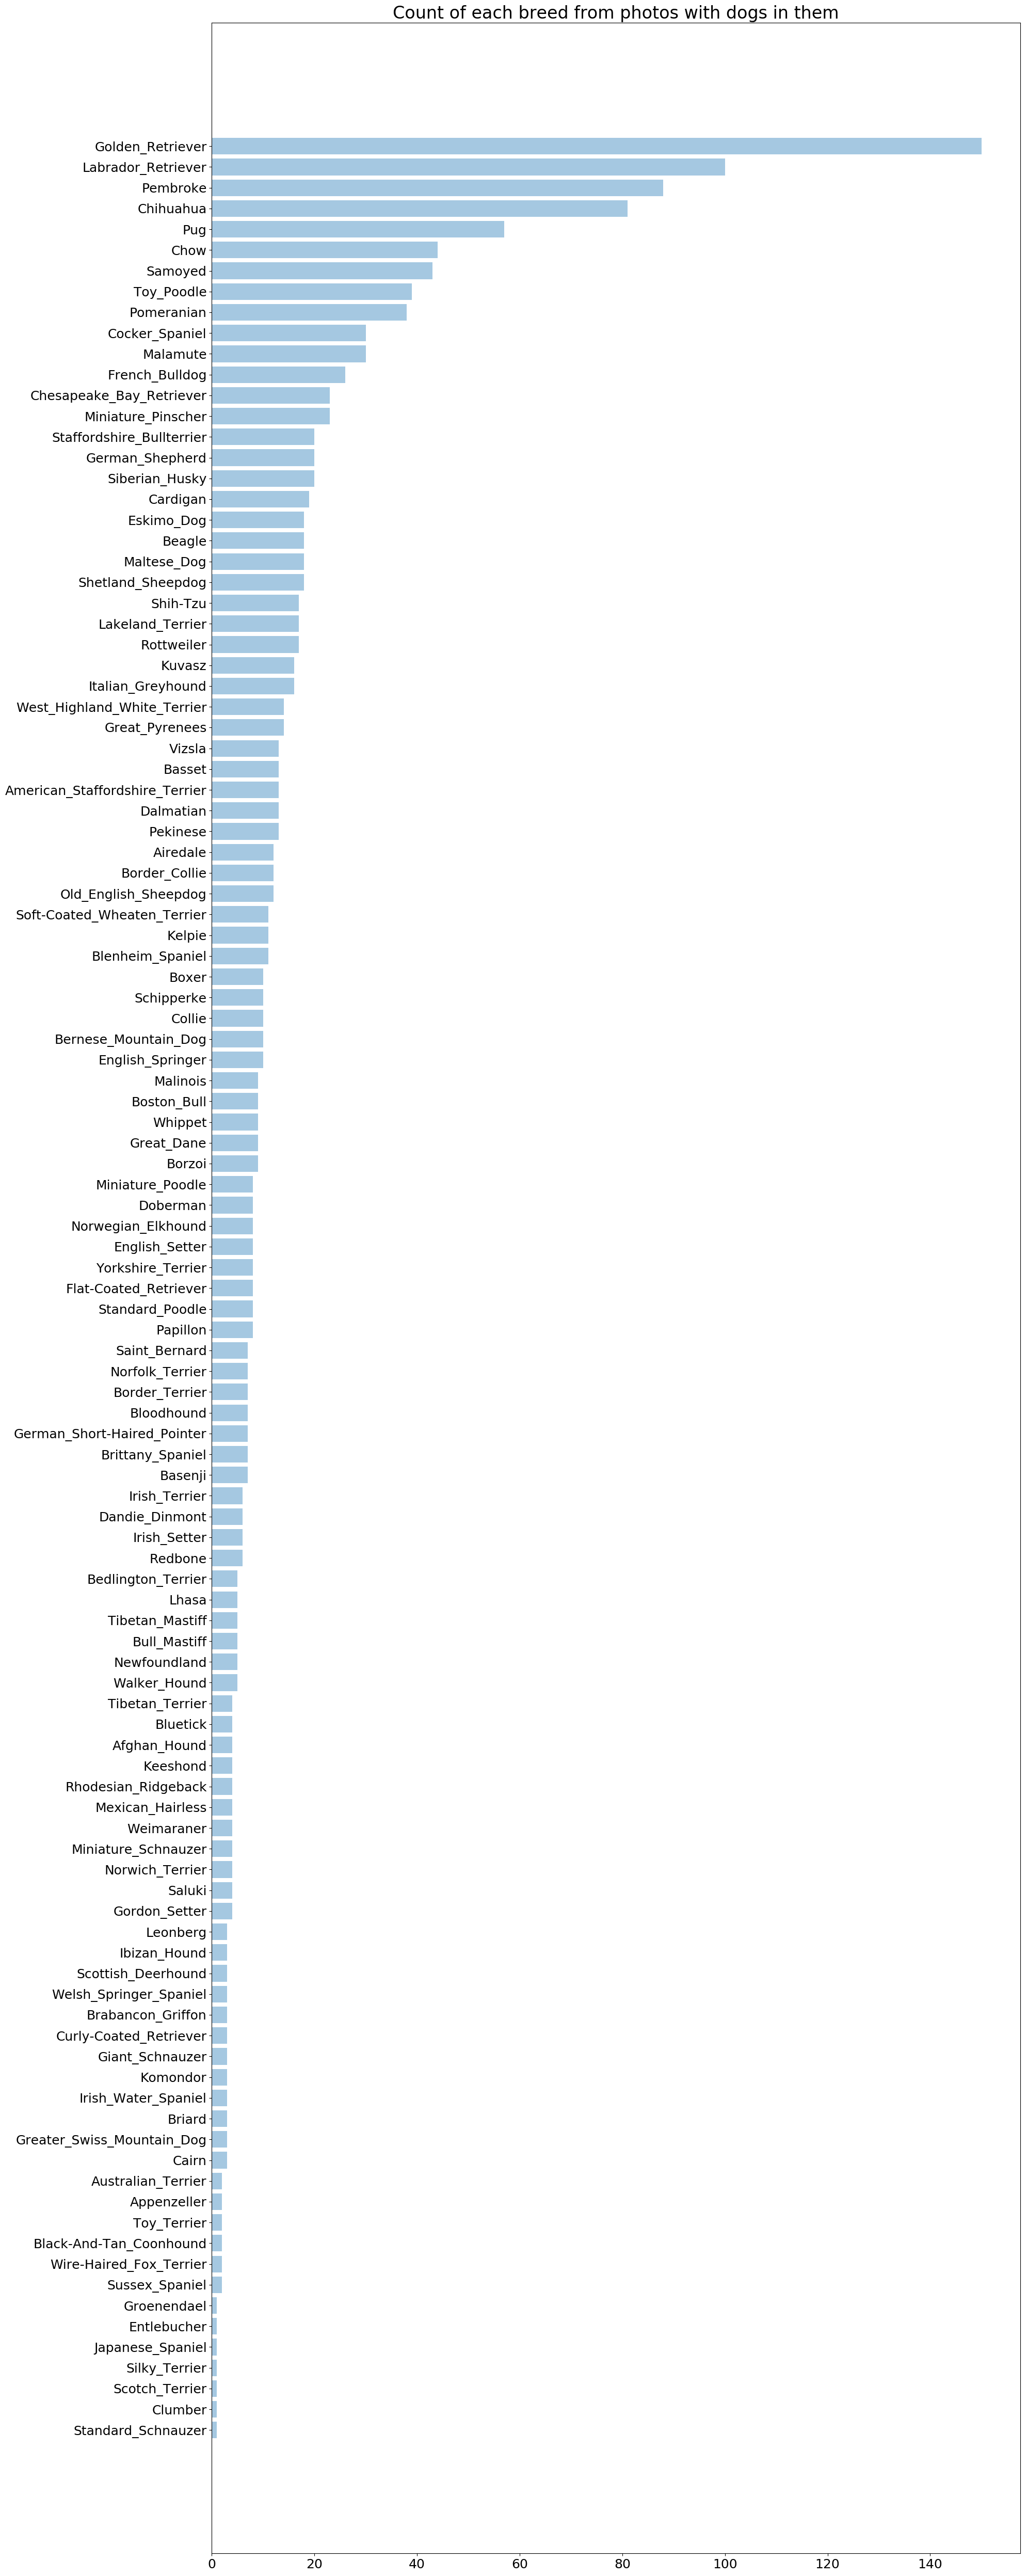

In [329]:
counts = tw_clean.p1.value_counts()

names = list(counts.axes[0])
names.reverse()
values = list(counts.get_values())
values.reverse()

fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.tick_params(axis='both', labelsize=18)
plt.yticks(yvals,names)
plt.title('Count of each breed from photos with dogs in them', fontsize = 24)
plt.tight_layout()

plt.show()


### Retweets by breed

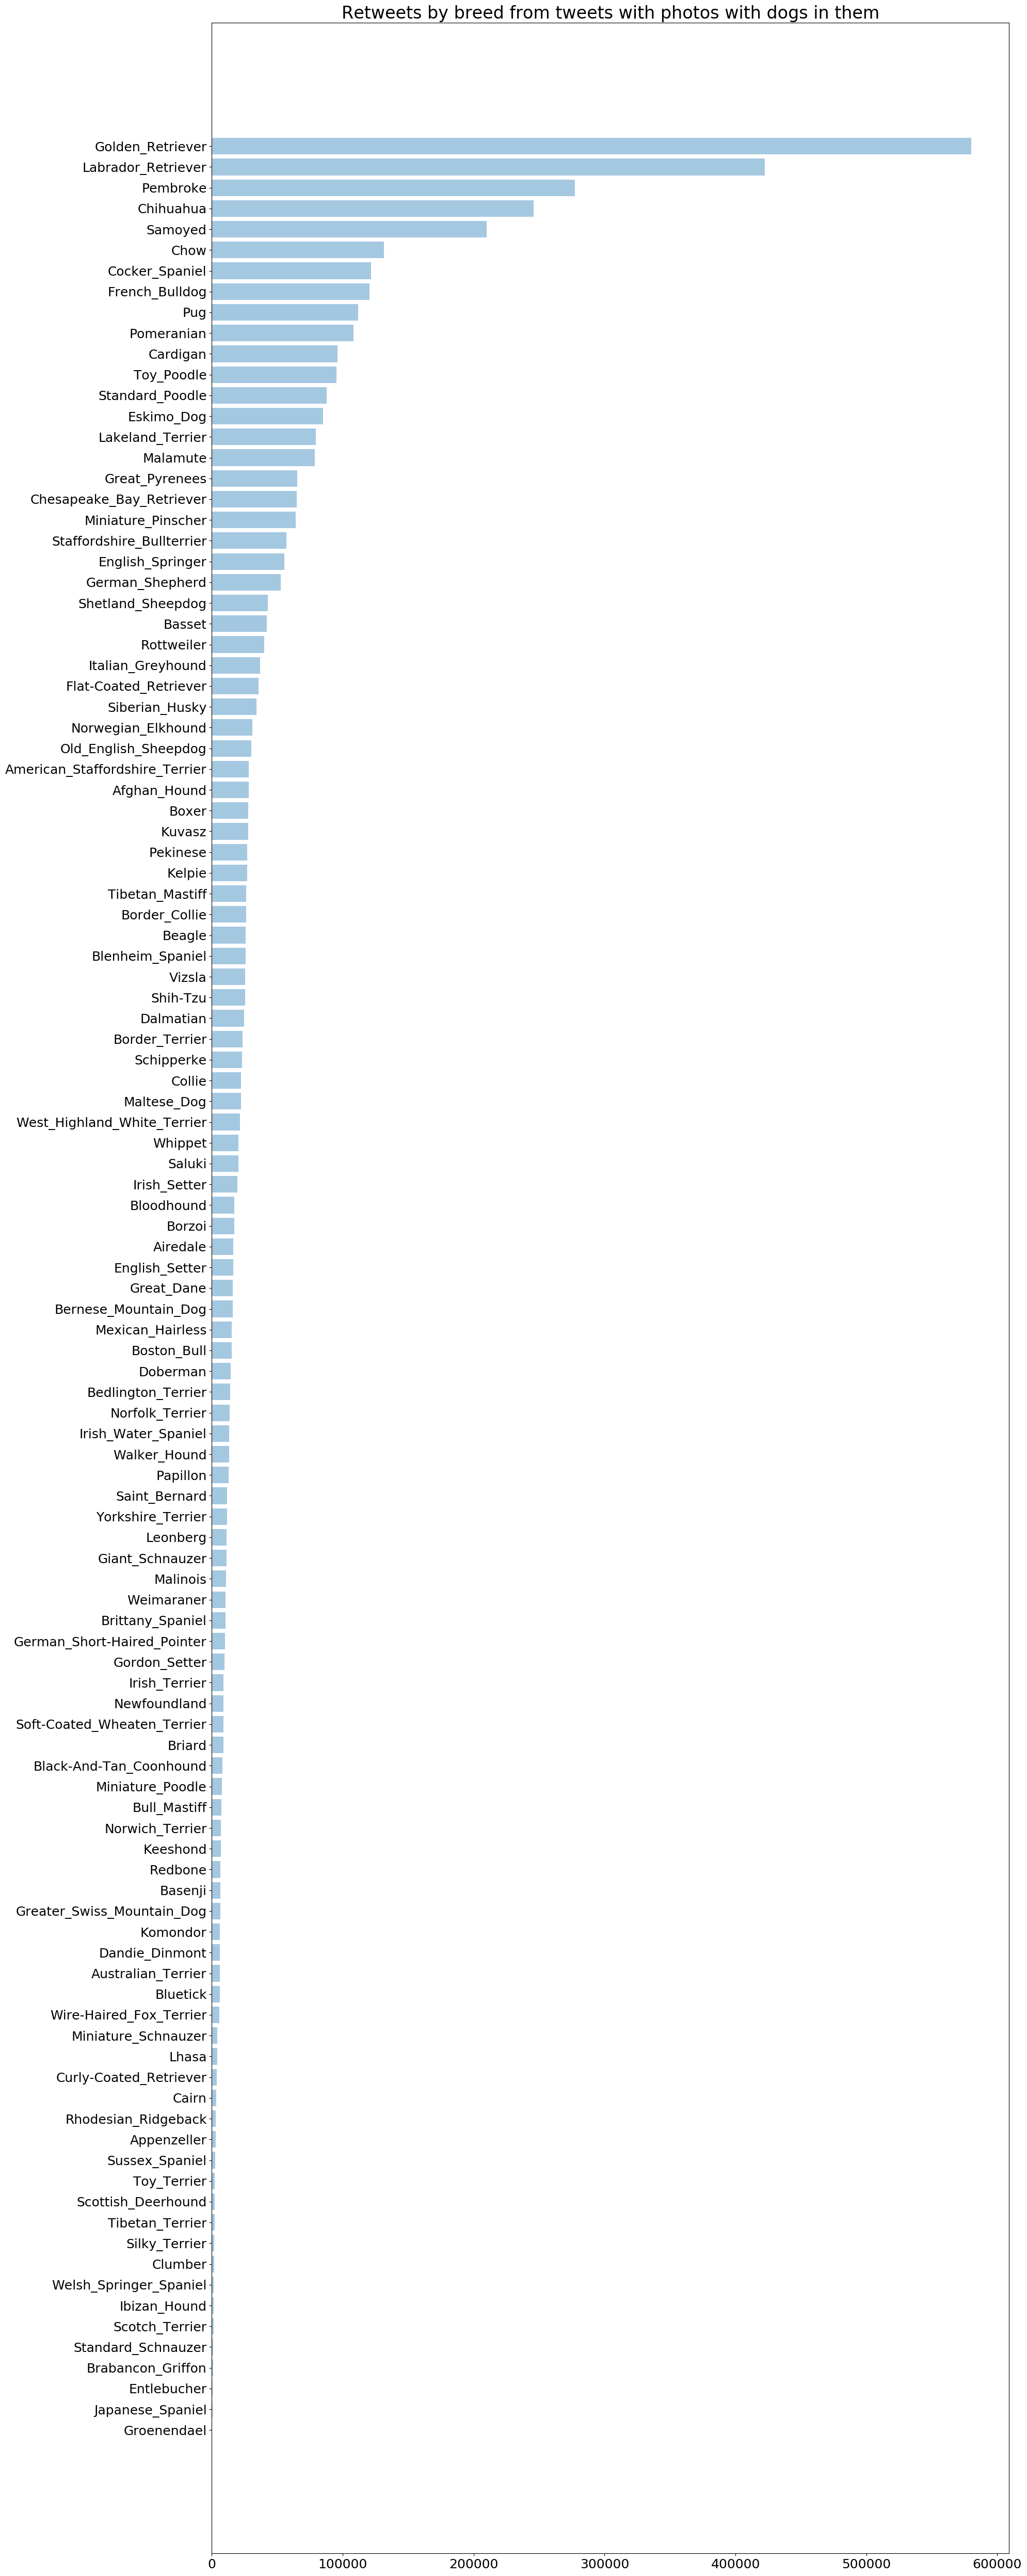

In [386]:
breed_rt = tw_clean.groupby('p1').agg({'retweet_count': sum})
breed_rt = breed_rt.retweet_count.sort_values(ascending=False)

names = list(breed_rt.axes[0])
names.reverse()
values = list(breed_rt.get_values())
values.reverse()

fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.tick_params(axis='both', labelsize=18)
plt.yticks(yvals,names)
plt.title('Retweets by breed from tweets with photos with dogs in them', fontsize = 24)
plt.tight_layout()

plt.show()

### Most popular stages

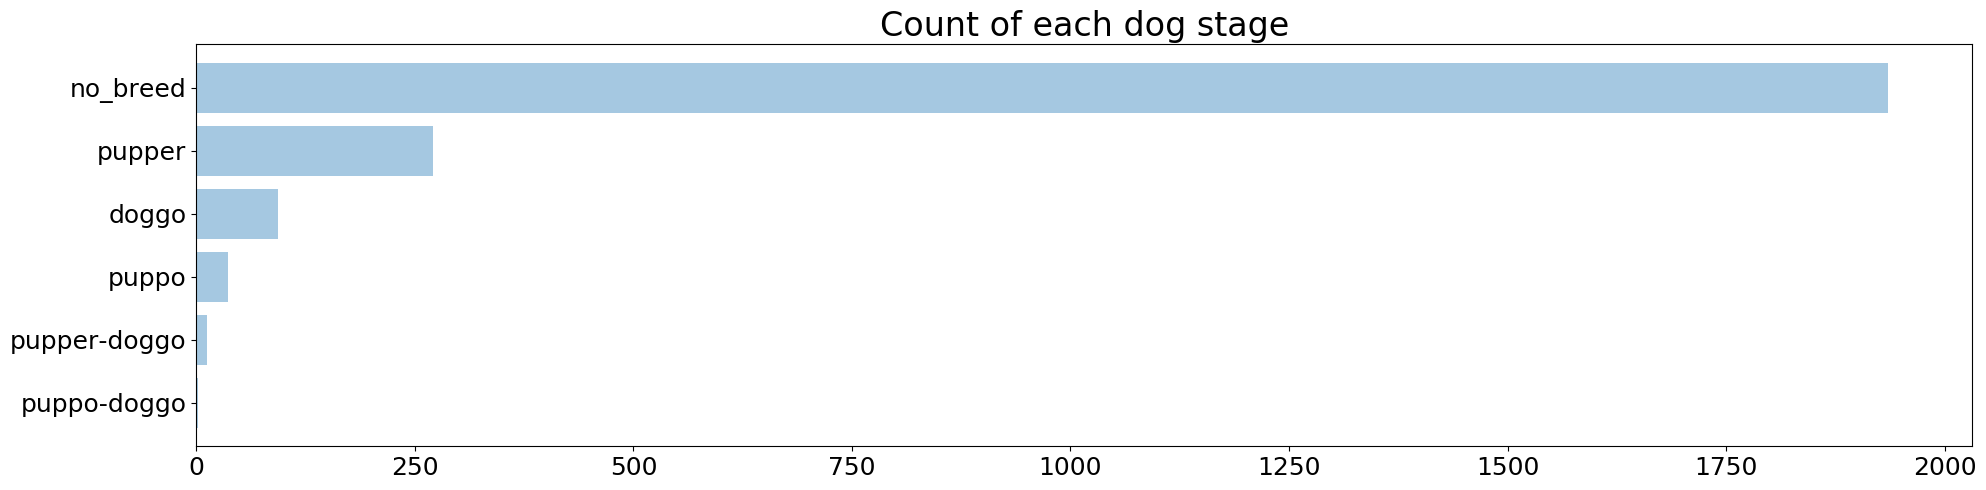

In [390]:
counts = tw_clean.Dog_stage_new.value_counts()

names = list(counts.axes[0])
names.reverse()
values = list(counts.get_values())
values.reverse()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.tick_params(axis='both', labelsize=18)
plt.yticks(yvals,names)
plt.title('Count of each dog stage', fontsize = 24)
plt.tight_layout()

plt.show()

### Retweet counts by rating

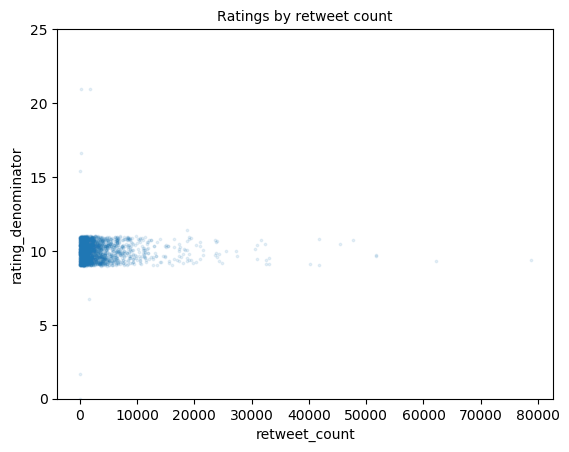

In [394]:
# To add jitter to scatterplot
jitter = np.random.uniform(low = -.99, high = .99, size = len(tw_clean))
tw_jitter = tw_clean.copy()
tw_jitter.retweet_count = tw_jitter.retweet_count + jitter
tw_jitter.rating_denominator = tw_jitter.rating_denominator + jitter
fig = tw_jitter.plot.scatter('retweet_count', 'rating_denominator',alpha=0.1, s=3)
fig.axes.set_ylim(0,25)
plt.title('Ratings by retweet count', fontsize = 10)
plt.show()

In [106]:
###For plotting later

#tw.retweet_count.describe()
#img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          